## Redes Convolucionales para reconocimiento de imágenes

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Implementación de Redes Convolucionales en Keras" se propuso una implementación a través de *"Keras"* de una red convolucional para una base de datos que contiene imágenes de dígitos manuscritos. En este *notebook* se pretende evaluar el uso de *keras* al aplicar una red convolucional sobre un conjunto de imágenes más complejo, "Fashion MNIST". 

### Instrucciones generales

1. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

2. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

### Criterios a evaluar

Los criterios que se evaluarán son:

Preparación de las variables: Se adaptan los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test. [15 puntos]

Estimación de un modelo utilizando redes neuronales convolucionales: Se estima el modelo usando una CNN, se establecen los parámetros y estructuras apropiadamente, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [45 puntos]

Calidad de la predicción: La arquitectura implementada posee un buen desempeño entre el nivel de precisión obtenido y el tiempo de ejecución. **Nota: Se considera un nivel de precisión del 91% como buen desempeño para este laboratorio**. Asegúrese de no implementar una red excesivamente profunda probándola en los servidores que ofrece la plataforma Coursera, pues con estos realizamos la calificaciónde su solución. [40 puntos]


#### Problema

Fashion-MNIST es una base de datos de imágenes de artículos de la tienda de ropa Zalando, que consta de un set de entrenamiento de 60000 muestras y un set de test de 10000 muestras. Cada dato es una imagen en escala de grises de una prenda de vestir, asociada con una etiqueta de 10 clases.

Ustedes deben proponer el algoritmo para hacer la clasificación de las prendas con una red neuronal convolucional.

### Librerías a importar

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#Las siguientes dos líneas evitan la generación de "warnings" y "flags" al importar keras y tensorflow.
#Dichas advertencias no comprometen el funcionamiento del código.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Importación de keras
import keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import AveragePooling2D


### 1. Preparación de las variables (15 puntos)

Adapte los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test.

In [7]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
#Importacion de datos
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
#Validacion de datos
print('Dimensiones de los datos de Training: ', x_train.shape, y_train.shape)
print('Dimensiones de los datos de Testing: ', x_test.shape, y_test.shape)
classes = np.unique(y_train)
nClasses = len(classes)
print('Número total de clases: ', nClasses)
print('Clases/labels: ', classes)

Dimensiones de los datos de Training:  (60000, 28, 28) (60000,)
Dimensiones de los datos de Testing:  (10000, 28, 28) (10000,)
Número total de clases:  10
Clases/labels:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Label : 9')

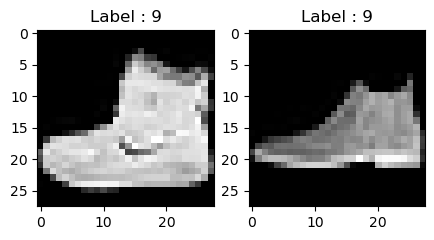

In [9]:
# Visualizacion de primeras imagenes
plt.figure(figsize=[5,5])
# Visualiza la primera imagen en la base de training
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Label : {}".format(y_train[0]))

# Visualiza la primera imagen en la base de testing
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("Label : {}".format(y_test[0]))

In [10]:
# Tranformacion de datos a numeros reales y escalamiento
train_X = x_train.astype('float32')
test_X = x_test.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Subdivision de datos de Train: Train + Validation
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, y_train, test_size=0.2, random_state=1324)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

#  Ajustamos las dimensiones de los datos para que puedan ser trabajadas por las funciones de keras
image_rows = train_X.shape[1]
image_cols = train_X.shape[2]
train_X = train_X.reshape(-1,image_rows,image_cols, 1)
test_X = test_X.reshape(-1,image_rows,image_cols, 1)
train_X.shape, test_X.shape

((48000, 28, 28, 1), (10000, 28, 28, 1))

En este paso, se cargó el conjunto de datos de Fashion MNIST usando la función load_data de Keras. Esta base de datos consta de imágenes de 28x28 píxeles en escala de grises, y contiene 60,000 imágenes para entrenamiento y 10,000 para pruebas. Posteriormente, se visualizó una muestra de las primeras imágenes tanto del conjunto de entrenamiento como del de test para tener una idea clara de su contenido. A continuación, los datos de imágenes fueron convertidos a tipo float32 y normalizados dividiendo por 255, con lo que se escala el rango de valores de los píxeles de [0, 255] a [0, 1], un paso importante para mejorar el entrenamiento de las redes neuronales. Luego, se separó el conjunto de entrenamiento en dos subconjuntos: uno para entrenamiento y otro para validación, utilizando un 80% para entrenamiento y un 20% para validación mediante la función train_test_split. Finalmente, se ajustaron las dimensiones de los datos para que fueran compatibles con las funciones de Keras, agregando una dimensión de canales y asegurando que las imágenes estuvieran en el formato adecuado para su uso en redes convolucionales.

La preparación de los datos fue realizada de manera efectiva, permitiendo que los datos estén listos para ser procesados por Keras. La normalización de las imágenes, al reducir los valores de píxel a un rango entre 0 y 1, es un paso crucial para que el modelo pueda aprender de manera eficiente, evitando problemas de desbordamiento y acelerando la convergencia del entrenamiento. La división del conjunto de entrenamiento en datos de entrenamiento y validación proporciona una estrategia adecuada para evitar sobreajuste y permite monitorear el desempeño del modelo durante el proceso de entrenamiento. En resumen, los datos han sido adecuadamente preparados y ahora están listos para ser utilizados en la construcción y entrenamiento de la red convolucional.

### 2. Estimación de un modelo utilizando redes neuronales convolucionales (45 puntos)

Estimen un modelo predictivo usando la muestra de entrenamiento y establezcan apropiadamente cada uno de los parámetros de la red.

In [11]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
# Red neuronal convolucional
digits_model = Sequential()

digits_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_rows, image_cols, 1), padding='same'))
digits_model.add(MaxPooling2D((2, 2), padding='same'))
digits_model.add(Dropout(0.4))

digits_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
digits_model.add(MaxPooling2D((2, 2), padding='same'))
digits_model.add(Dropout(0.4))


digits_model.add(Flatten())
digits_model.add(Dense(128, activation='relu'))               
digits_model.add(Dense(nClasses, activation='softmax'))

# Funcion de perdida, optimizador y metrica
digits_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01),metrics =['accuracy'])
digits_model.summary()

# Entrenar modelo
batch_size = 4800
epochs = 25
digits_train = digits_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

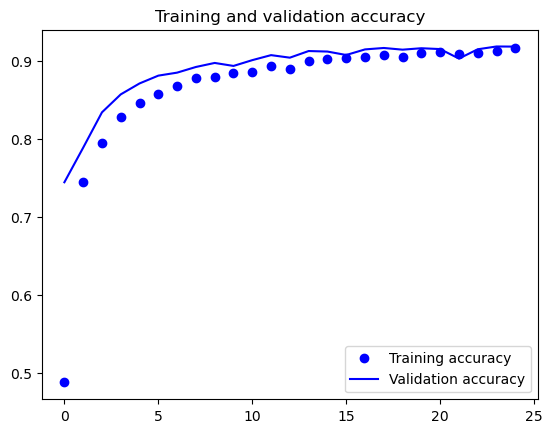

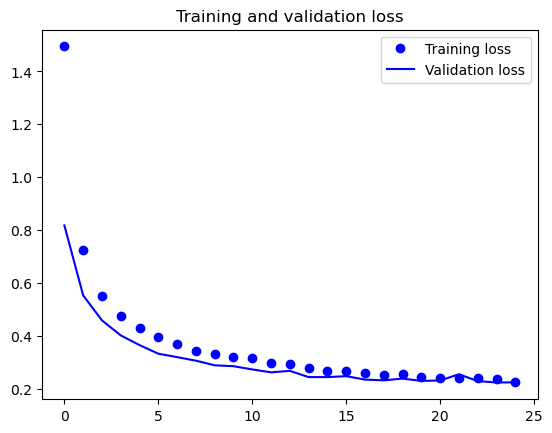

In [12]:
accuracy = digits_train.history['accuracy']
val_accuracy = digits_train.history['val_accuracy']
loss = digits_train.history['loss']
val_loss = digits_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Para estimar un modelo predictivo utilizando redes neuronales convolucionales (CNN), se diseñó una arquitectura compuesta por dos bloques de capas convolucionales y de max pooling. Cada bloque incluye una capa Conv2D con activación ReLU para extraer características espaciales, seguida de una capa MaxPooling2D para reducir la dimensionalidad y una capa Dropout con una tasa elevada (0.4) para mitigar el sobreajuste. Posteriormente, las características extraídas se aplanan (Flatten) y se pasan a una capa densa de 128 neuronas con activación ReLU, finalizando con una capa de salida Dense con activación softmax para la clasificación multiclase. Se utilizó la función de pérdida sparse_categorical_crossentropy y el optimizador Adam con una tasa de aprendizaje ajustada a 0.01. El modelo fue entrenado con un batch_size de 4800 durante 25 épocas, utilizando un conjunto de validación para monitorear el desempeño.

**Conclusiones**

El modelo mostró un progreso constante en la precisión tanto en entrenamiento como en validación, alcanzando un Accuracy final del 91.6% en entrenamiento y 91.8% en validación, lo que indica una buena capacidad de generalización. La pérdida de validación se mantuvo estable, sin señales claras de sobreajuste, lo cual sugiere que el uso de Dropout fue efectivo para mejorar la robustez del modelo. Sin embargo, se observa que la precisión mejora lentamente a partir de la época 15, lo que sugiere que podría explorarse una tasa de aprendizaje más baja o un mayor número de épocas para seguir mejorando el rendimiento. También podría probarse una arquitectura más profunda o incluir regularización adicional para afinar aún más los resultados. En general, el modelo construido resulta adecuado para tareas de clasificación de imágenes como Fashion MNIST.

### 3. Calidad de la predicción (40 puntos)

Evalúe el desempeño de su algoritmo con el set de _test_ y argumente sobre el nivel de precisión obtenido, tiempo de ejecución y la arquitectura de su red convolucional.

313/313 [==============================] - 7s 10ms/step
Se encontraron 9065 labels correctos


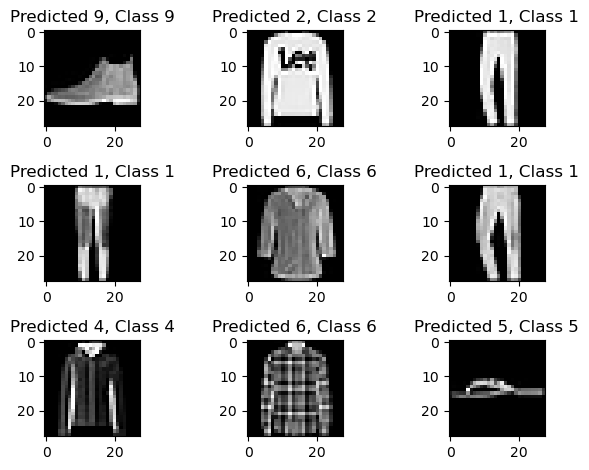

In [14]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
predicted_classes = digits_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==y_test)[0]
test="Se encontraron %s labels correctos" % len(correct)
print(test) 
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

In [15]:
test_eval = digits_model.evaluate(test_X, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2415897250175476
Test accuracy: 0.9133999943733215


El modelo alcanzó una precisión del 91.34% en el conjunto de prueba, lo que indica una alta capacidad para generalizar a datos no vistos. De las 10,000 imágenes del set de test, 9,065 fueron clasificadas correctamente, lo que refuerza la solidez del entrenamiento y la efectividad de la arquitectura empleada.

El proceso de predicción del conjunto completo de test se completó en aproximadamente 7 segundos, lo cual es razonablemente eficiente considerando el tamaño de los datos y la complejidad de la red.

La arquitectura utilizada combina dos bloques de capas convolucionales (Conv2D) con 32 y 64 filtros respectivamente, seguidos por capas de MaxPooling2D para reducir la dimensionalidad y Dropout con tasa de 0.4 para evitar sobreajuste. Posteriormente, se aplanan las características extraídas (Flatten) y se alimentan a una capa totalmente conectada (Dense) de 128 unidades antes de llegar a la salida softmax. Esta arquitectura equilibrada logró un buen compromiso entre profundidad, capacidad de aprendizaje y eficiencia computacional.